# Observando Ações

Este _notebook_ foi pensado para ser uma ferramenta de uso pessoal de exploração e visualização de dados de ações e estudos.

In [1]:

#---------------------------------# bibliotecas
import matplotlib.pyplot as  plt  #
import numpy             as  np   #
import pandas            as  pd   #
import seaborn           as  sns  #
import yfinance          as  yf   #
#---------------------------------#

#-------------------# prepara visualização:
%matplotlib inline
sns.set() 

#-------------------# ações de interesse:
ativos = [
    'NUBR33.SA', #   0  ->  nubank
    'BBAS3.SA',  #   1  ->  banco do brasil
    'AAPL34.SA', #   2  ->  apple
    'A1MD34.SA', #   3  ->  amd
    'ITLC34.SA', #   4  ->  intel
    'GOGL34.SA'  #   5  ->  google
]

#------------------------------------------------# dataset
t0 = pd.to_datetime('2017-01-01')                #
t1 = pd.to_datetime('now')                       #
papel = yf.download(ativos[1], start=t0, end=t1) #
#------------------------------------------------#

[*********************100%***********************]  1 of 1 completed


# Médias Móveis:

In [2]:
ano2023 = (papel.index >= '2023') #---------> filtro
                      
#---------# médias móveis:    
#---------------------------------------------------------#
papel['mm6']  = papel['Close'].rolling(window=6).mean()   #
papel['mm28'] = papel['Close'].rolling(window=28).mean()  #
papel['mm64'] = papel['Close'].rolling(window=64).mean()  #
#---------------------------------------------------------#


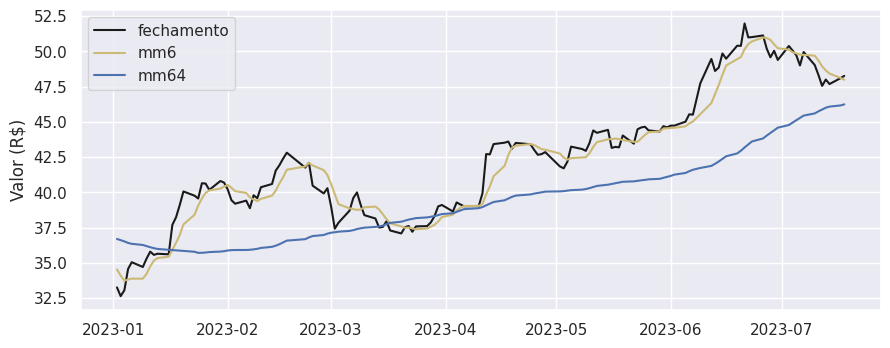

In [3]:
fig1 = plt.figure(figsize=(8,3), dpi=100)

axes1 = fig1.add_axes([0, 0, 1, 1])
axes1.plot(papel[ano2023]['Close'], 'k', label='fechamento')   
axes1.plot(papel[ano2023]['mm6']  , 'y', label='mm6')   
#axes1.plot(papel[ano2023]['mm28'] , 'g', label='mm28')   
axes1.plot(papel[ano2023]['mm64'] , 'b', label='mm64')   
axes1.set_ylabel('Valor (R$)')
axes1.legend(loc=0)

In [4]:
papel

,Open,High,Low,Close,Adj Close,Volume,mm6,mm28,mm64
Date,,,,,,,,,
2017-01-02,27.900000,27.959999,27.440001,27.540001,19.032499,1968200,NaN,NaN,NaN
2017-01-03,27.760000,28.799999,27.760000,28.799999,19.903269,7578900,NaN,NaN,NaN
2017-01-04,28.650000,29.000000,28.549999,28.650000,19.799606,4156300,NaN,NaN,NaN
2017-01-05,28.719999,28.900000,28.430000,28.580000,19.751226,5457100,NaN,NaN,NaN
2017-01-06,28.580000,28.930000,28.540001,28.889999,19.965458,3692400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-12,48.939999,48.939999,47.360001,47.560001,47.560001,12229100,48.941667,49.077500,45.884531
2023-07-13,47.860001,48.380001,47.590000,48.009998,48.009998,7034200,48.653333,49.194286,46.010625
2023-07-14,47.959999,48.709999,47.410000,47.689999,47.689999,13105800,48.433333,49.289643,46.088281
